Importing Libraries and Dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

In [17]:
df=pd.read_csv('flipkart_data.csv')
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


Preprocessing the Data

In [18]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
  df['review']=df['review'].str.lower()
  df['review']=df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
  df['sentiment']=df['rating'].apply(lambda x: 1 if x>=4 else 0)
  return df

df_cleaned=preprocess_reviews_stopwords(df)
df_cleaned.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,sentiment
0,nice produt. like design lot. easy carry. and....,5,1
1,awesome sound....very pretty see nd sound qual...,5,1
2,awesome sound quality. pros 7-8 hrs battery li...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [19]:
df.isna().sum()

,0
review,0
rating,0
sentiment,0


Visualizing the Data

sentiment
1    8091
0    1885
Name: count, dtype: int64


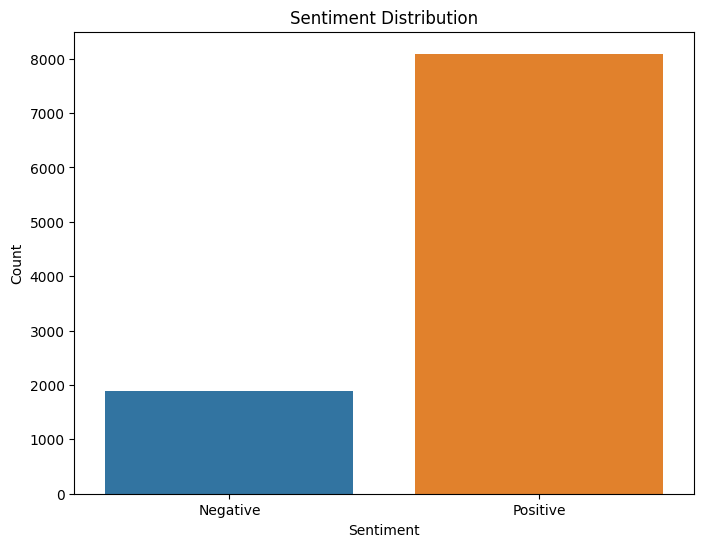

In [20]:
sentiment_counts=df_cleaned['sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

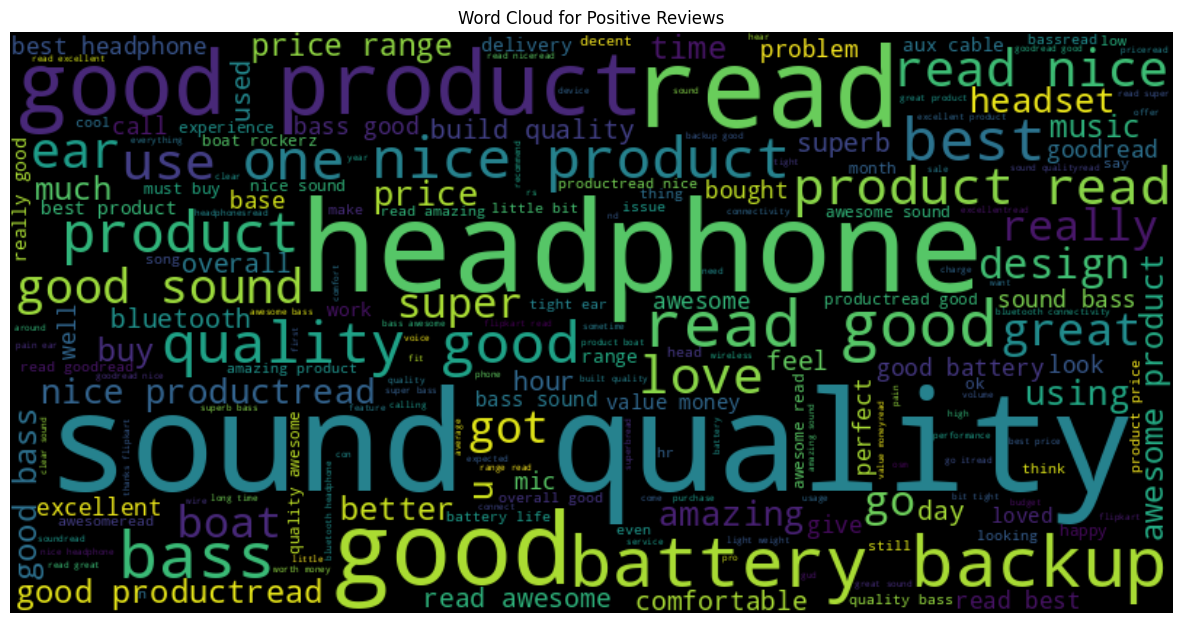

In [21]:
positive_reviews=df_cleaned[df_cleaned['sentiment']==1]['review']
positive_text=' '.join(positive_reviews)
wordcloud=WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

Vectorizing the Text Data

In [22]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df_cleaned['review'])
y=df_cleaned['sentiment']

Model Training, Evaluation and Prediction

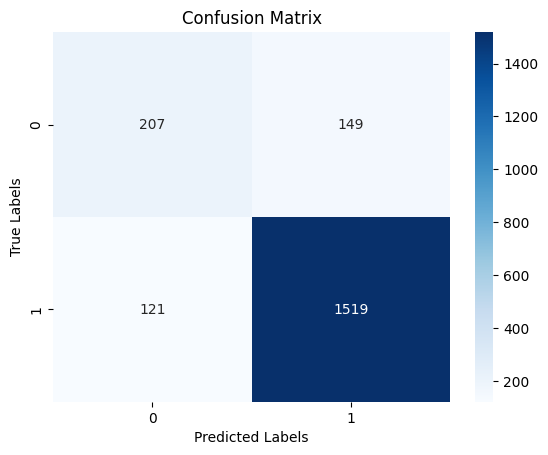

Accuracy: 86.47%


In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy*100:.2f}%')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       356
           1       0.91      0.93      0.92      1640

    accuracy                           0.86      1996
   macro avg       0.77      0.75      0.76      1996
weighted avg       0.86      0.86      0.86      1996

